# Random search method

What is the random search method?

The random search method is a simple approach for hyperparameter optimization in ML. It is a popular technique widely used by practitioners because of its simplicity and ease of implementation. We’ll learn its theory and how to apply it in a simple ML project using the open-source Python library called scikit-learn.

The random search method involves selecting random combinations of hyperparameter values of a particular ML algorithm, such as logistic regression. Then it evaluates the performances of the ML model using the selected combination of hyperparameter values.

It repeats this process for a fixed number of iterations with different combinations of hyperparameter values that are randomly selected. This can be done by defining a range of values for each hyperparameter and then randomly sampling from these ranges for eac

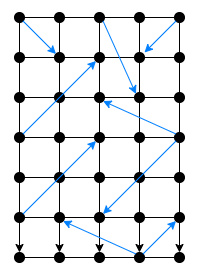

One of the key advantages of the random search method is that it is computationally efficient. It only evaluates a fixed number of random combinations, so it is not as computationally expensive as other methods, such as grid search or Bayesian optimization.

Finally, the combination of hyperparameter values that produce the best performance is selected as a final set of hyperparameters for the ML models. The final set of hyperparameters can then train the final ML model on the entire dataset. This approach is simple yet effective, and it is a great starting point for any ML practitioners who are new to hyperparameter optimization.

The random search method does not try to use all hyperparameter values we have specified; it’ll only select a few of them based on the number of iterations. If we set the number of iterations to five, it’ll randomly select five different combinations of hyperparameters to determine which one of them produces an ML model with the best performa

nce.rma
nce.tion.

## Import Important packages
First, we import important Python packages that will do the following tasks:

- Load the dataset.
- Clean the dataset.
- Process the dataset using feature engineering techniques.
- Create and train machine learning model (random forest algorithm).
- Check machine learning model performance.
- Implement the random search method.
- Identify combination of hyperparameters that provide the best results.



In [1]:
# Import important modules
import numpy as np
import pandas as pd

# sklearn modules
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

import warnings

warnings.filterwarnings("ignore")
# Seeding
np.random.seed(123)

## Load the dataset
We will use pandas to load the dataset from the data folder. The name of the dataset is
loan_data.csv.

In [2]:
# Load data

data_path = "loan_data.csv"

data = pd.read_csv(data_path)

Let’s see the first five rows of the dataset using the head() method from pandas.

In [3]:
# Show the top five rows of data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


As we can see, the dataset has 13 columns.

- Loan_ID: Unique loan ID
- Gender: Male/Female 
- Married: Applicant married (Y/N)
- Dependents: Number of dependents
- Education: Applicant education (Graduate/Undergraduate)
- Self_Employed: Self-employed (Y/N)
- ApplicantIncome: Applicant income
- CoapplicantIncome: Co-applicant income
- LoanAmount: Loan amount in thousands
- Loan_Amount_Term: Term of the loan in months
- Credit_History: Credit history meets guidelines
- Property_Area: Urban/Semi-Urban/Rural
- Loan_Status: Loan approved (Y/N)

The shape method from pandas will let us know the total number of rows and columns available in
the dataset.

In [4]:
# Check the shape of the data
data.shape

(614, 13)

The dataset has 614 loan data.

The pandas method called info() provides more details about each column presented in the dataset.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


The information above shows that the dataset has columns with different data types, such as object/string, integers, and float.

## Check missing values

It is important to clean the dataset by checking if it has any missing values before starting to
train the machine learning model.

The following code will provide a total of missing values for each column presented in the dataset.

In [6]:
# Check the missing values in data
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The output shows that our dataset has some missng values in different columns.

First, let’s convert some values in the Loan_Status and Dependents columns into numerical values.

In [7]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [9]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
# Replace with numerical values
data['Dependents'].replace('3+', 3,inplace=True)
data['Loan_Status'].replace('N', 0,inplace=True)
data['Loan_Status'].replace('Y', 1,inplace=True)

For columns with object data type, we use the mode() function from pandas to identify the most common value in that particular column and insert the identified value into all missing points in the column.

For columns with numerical data type(int64 or float64), we use the median() function from pandas to find the median value in that particular column and insert the identified value into all missing points in the column.

In [17]:
round(100*(data.isnull().sum()/len(data.index)),2)

Loan_ID              0.00
Gender               2.12
Married              0.49
Dependents           2.44
Education            0.00
Self_Employed        5.21
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           3.58
Loan_Amount_Term     2.28
Credit_History       8.14
Property_Area        0.00
Loan_Status          0.00
dtype: float64

In [29]:
# Handle missing data 
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

We drop the ID column because it is not used in the process of training a machine learning model.

In [30]:
# Drop ID column
data = data.drop('Loan_ID',axis=1)

Let's check again if all missing values in the dataset have been handled.

In [31]:
# Check missing values in data
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Finally, the dataset does not have any missing values.

## How to evaluate class distribution
Identifying the class distribution helps us to know if the dataset is balanced or not. The value_counts() method from the pandas package can evaluate the class distribution by showing the total number of each unique value in the target column.

In [32]:
# Evaluate the Loan_status column
data.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

This shows that in this dataset, the distribution in the target column is unequal. There are more 1 values (Yes) than 0 values (No).

## Split data into feature and target variables

The next step is to split data into feature and target variables.

In [33]:
#Split features and target from  data
X = data.drop('Loan_Status',axis = 1)
y = data.Loan_Status.values

The target is the Loan_Status variable.

## Preprocess the features

However, before we train the machine learning model, we need to transform our features into numerical values so that the machine learning model can understand the data. In this case, we will use: 

- The **MinMaxScaler()** method from scikit-learn to scale the minimum and maximum values to be 0 and 1, respectively, for the columns with int64 and float64 data types.
- The **get_dummies()** method from pandas to convert categorical variables into indicator variables. These variables will have a value of 0 or 1. This method can automatically identify categorical variables and convert them into indicator variables with a value of 0 or 1.

In [34]:
#Scale the numerical columns with MinMaxScaler() 
X["ApplicantIncome"] = MinMaxScaler().fit_transform(X["ApplicantIncome"].values.reshape(-1,1))
X["LoanAmount"] = MinMaxScaler().fit_transform(X["LoanAmount"].values.reshape(-1,1))
X["CoapplicantIncome"] = MinMaxScaler().fit_transform(X["CoapplicantIncome"].values.reshape(-1,1))
X["Loan_Amount_Term"] = MinMaxScaler().fit_transform(X["Loan_Amount_Term"].values.reshape(-1,1))

In [35]:
#Change categorical features to numerical with get_dummies() 
X = pd.get_dummies(X)


#Convert the DataFrame to a NumPy array. 
X = X.to_numpy()

## Train a base machine learning model

In this Example,we will train the random forest algorithm  with default hyperparameter values using the Cross-validation technique to check the model performance.


In [36]:
# Create a classifier
random_classifier = RandomForestClassifier() 

We will use the `cross_val_score()` method from scikit-learn to train and evaluate a machine learning model across numerous folds of the dataset. This cross-validation method provides a more comprehensive understanding of the model’s performance across the entire dataset than a simple train/test split.


To use `cross_val_score()` method, we need to define the following parameters:

1. `estimator`: The machine learning model object to fit the data
2. `X`: The data/features to fit the machine learning model on
3. `y`: The target variable of the model classification or regression tasks
4. `scoring`: The evaluation error metric to use
5. `cv`: The number of splits to use (example 3).


The main goal is to prevent model over-fitting and promote model generalization.


Note: The machine learning model’s performance will be evaluated using the f1_score evaluation metric. We use f1_score because we have an unequal number of classes in the Loan_Status variable.

In [37]:
# Define function to evaluate f1_score
def f1_scorer(estimator, X, y):
    y_preds = estimator.predict(X)
    f1 = f1_score(y, y_preds, average='macro')
    return round(f1, 4)

# Implement and run the cross-val-score method
score = cross_val_score(estimator=random_classifier,
                        X=X,
                        y=y,
                        scoring=f1_scorer,
                        cv=3,
                        n_jobs=-1)

# Print the mean score
print(round(score.mean(), 4))

0.7124


The mean score of our machine learning model is  0.7146 which is a good performance.

## Implement the random search method

Since we know how well the machine learning model works with the default hyperparameter values, we can try to improve the model’s performance by using the random search method to find the combination of hyperparameter values that can give an F1-score of more than 0.7066.

The random forest algorithm has multiple hyperparameters, as shown below:

`RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)` [source](https://github.com/scikit-learn/scikit-learn/blob/9aaed4987/sklearn/ensemble/_forest.py#L1081)

However, for this example, we will use the following important hyperparameters to find the right combination of their values to get an F1-score greater than 0.7066.

- `n_estimators`:Represents the number of trees in the forest
- `criterion`: The function to measure the quality of a split
- `max_depth`: The maximum depth of the tree

To implement the random search method using the scikit-learn library, we need to define the following important parameters.

- `estimator`: The machine learning algorithm to train with different combinations of
hyperparameter's values
- `param_distributions`: This is the dictionary with parameter names (string value) as keys and distributions or lists of parameters to try (search space)
- `n_iter`: Number of iterations
- `scoring`: The method to evaluate the performance of the cross-validated model. For this example, we will use the F1-score.
- `CV`: The number of folds for cross-validation. The standard numbers are 5 and 10.

In [17]:
# Define the parameters for random search method

#1. Estimator
rf_classifier = RandomForestClassifier(n_jobs=-1)

#2. Param distributions (define the search space)
distributions = dict(
    n_estimators=[50, 100, 150, 200, 250, 300, 400],
    criterion=['gini', 'entropy', 'log_loss'],
    max_depth=[10, 20, 40, 50, 60, 70, 80, 90, 100, None],
)

#3. Number of iterations
n_iter = 20

#4. Scoring
scoring = f1_scorer

#5. Cross-validation splitting strategy.
cv = 3

Note: We need to read the algorithm documentation to understand the function of each
hyperparameter and the types of values we can add to the params distribution. For the random forest algorithm, we can read [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

The next step is to import RandomizedSearchCV from the scikit-learn library and instantiate the random search.

In [18]:
# Import the random search method from scikit-learn
from sklearn.model_selection import RandomizedSearchCV

# Define search
search = RandomizedSearchCV(estimator=rf_classifier,
                            param_distributions=distributions,
                            n_iter=n_iter,
                            scoring=scoring,
                            cv=cv,
                            random_state=1235)

Once everything has been defined, the search is executed using the fit() method with the train dataset.

In [19]:
# Execute search
results = search.fit(X, y)

Note: The time it takes to run the search could range anywhere from a few minutes to hours, depending on the scope of the search space, dataset size, and the processing power of the hardware.

At the end of the search, we can use the following attributes to access all the results.

- `best_estimator`: The estimator that gave highest score
- `best_params`: The combination of hyperparameters that gave best results
- `best_scores`: The mean cross-validated score of the best_estimator

In [20]:
print("best estimator:", results.best_estimator_)

best estimator: RandomForestClassifier(criterion='entropy', max_depth=50, n_estimators=300,
                       n_jobs=-1)


In [21]:
print("best combination of hyperparameters:", results.best_params_)

best combination of hyperparameters: {'n_estimators': 300, 'max_depth': 50, 'criterion': 'entropy'}


In [22]:
print("Best score:", round(results.best_score_,4))

Best score: 0.7115


The best score is 0.7218, which is greater than 0.7066.

As we can see the performance of the machine learning model has improved compared to the machine learning model trained with default hyperparameters. This shows that despite its simplicity, random search has the ability to identify optimal combinations of hyperparameters that result in good model performance, especially when the search space is not large.

However, if we try to rerun it, it may be able to provide better results than this. Sometimes, it may produce poor results because it does not try all possible combinations of hyperparameters.

# Advantages of the random search method

Simplicity: The random search method is a simple and straightforward method for hyperparameter optimization, as it does not require any knowledge about 
the structure of the optimization landscape or the relationships between different hyperparameters.

Less computational power: The random search method does not require large amounts of computational power compared to other methods for hyperparameter
optimization because we can define the number of combinations of hyperparameters to try.

Flexibility: Random search is easily configured to various model and hyperparameter spaces and is compatible with different evaluation metrics to 
calculate the performance.

Potential: Despite its simplicity, random search has the ability to identify good combinations of hyperparameters that result in good model
performance, particularly when the search space is not large.

# Disadvantages of the random search method

Deficient: It is less effective compared to advanced methods such as grid search or Bayesian optimization because it doesn’t guarantee to give the
best combination of hyperparameters for optimal model performance. This is because it does not try all possible combinations of hyperparameters.

Lack of reproducibility: The results of a random search are difficult to recreate because the search itself is based on random sampling. This makes
it impossible to reproduce the results. It is not always easy to determine which group of hyperparameters was utilized for a particular model or to
reproduce the results because it always randomly selects the combination of hyperparameters.

                                   